## Finetuning YoloV8 Model with Noise Dataset
Using a model that used weights previously trained on COCO dataset - final layer trained with custom rideshare dataset


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

In [ ]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-25ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [ ]:
!unzip  /content/drive/MyDrive/yolov7/yolov7/data/test/noise_test.zip -d /content/drive/MyDrive/yolov7/yolov7/data/test

Archive:  /content/drive/MyDrive/yolov7/yolov7/data/test/noise_test.zip
  inflating: /content/drive/MyDrive/yolov7/yolov7/data/test/0q2.jpg  
  inflating: /content/drive/MyDrive/yolov7/yolov7/data/test/5q2.jpg  
  inflating: /content/drive/MyDrive/yolov7/yolov7/data/test/6q1.jpg  
  inflating: /content/drive/MyDrive/yolov7/yolov7/data/test/11q1.jpg  
  inflating: /content/drive/MyDrive/yolov7/yolov7/data/test/12q4.jpg  
  inflating: /content/drive/MyDrive/yolov7/yolov7/data/test/20q2.jpg  
  inflating: /content/drive/MyDrive/yolov7/yolov7/data/test/26q1.jpg  
  inflating: /content/drive/MyDrive/yolov7/yolov7/data/test/29q1.jpg  
  inflating: /content/drive/MyDrive/yolov7/yolov7/data/test/31q3.jpg  
  inflating: /content/drive/MyDrive/yolov7/yolov7/data/test/31q4.jpg  
  inflating: /content/drive/MyDrive/yolov7/yolov7/data/test/34q4.jpg  
  inflating: /content/drive/MyDrive/yolov7/yolov7/data/test/36q3.jpg  
  inflating: /content/drive/MyDrive/yolov7/yolov7/data/test/37q3.jpg  
  inflat

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!yolo task=detect mode=train model=/content/drive/MyDrive/last-4.pt data= /content/drive/MyDrive/yolov7/yolov7/data/coco.yaml epochs=100 device=0


Ultralytics YOLOv8.0.123 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/last-4.pt, data=/content/drive/MyDrive/yolov7/yolov7/data/coco.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ker

In [ ]:
!cp -r "/content/runs" "/content/drive/MyDrive"

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data="/content/drive/MyDrive/yolov7/yolov7/data/coco.yaml" device=0

Ultralytics YOLOv8.0.123 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/yolov7/yolov7/data/val... 241 images, 153 backgrounds, 0 corrupt: 100% 241/241 [00:00<00:00, 331.50it/s]
val: New cache created: /content/drive/MyDrive/yolov7/yolov7/data/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:07<00:00,  2.02it/s]
                   all        241         94      0.813       0.67      0.748       0.34
Speed: 1.7ms preprocess, 5.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val


In [ ]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' source='/content/drive/MyDrive/cartest_final.jpg' device=0


Ultralytics YOLOv8.0.123 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/cartest_final.jpg: 480x640 1 rideshare, 53.7ms
Speed: 2.6ms preprocess, 53.7ms inference, 90.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2


In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('/content/drive/MyDrive/runs/detect/train/weights/best.pt')

# Define path to directory containing images and videos for inference
source = '/content/drive/MyDrive/yolov7/yolov7/data/test'

# Run inference on the source
results = model(source, stream=False)  # generator of Results objects


image 1/121 /content/drive/MyDrive/yolov7/yolov7/data/test/0q2.jpg: 480x640 1 rideshare, 173.4ms
image 2/121 /content/drive/MyDrive/yolov7/yolov7/data/test/101q2.jpg: 480x640 (no detections), 10.1ms
image 3/121 /content/drive/MyDrive/yolov7/yolov7/data/test/101q4.jpg: 480x640 1 rideshare, 13.0ms
image 4/121 /content/drive/MyDrive/yolov7/yolov7/data/test/102q1.jpg: 480x640 (no detections), 7.5ms
image 5/121 /content/drive/MyDrive/yolov7/yolov7/data/test/103q1.jpg: 480x640 (no detections), 6.0ms
image 6/121 /content/drive/MyDrive/yolov7/yolov7/data/test/104q1.jpg: 480x640 1 rideshare, 6.1ms
image 7/121 /content/drive/MyDrive/yolov7/yolov7/data/test/104q4.jpg: 480x640 (no detections), 6.0ms
image 8/121 /content/drive/MyDrive/yolov7/yolov7/data/test/108q3.jpg: 480x640 (no detections), 6.0ms
image 9/121 /content/drive/MyDrive/yolov7/yolov7/data/test/109q2.jpg: 480x640 (no detections), 6.0ms
image 10/121 /content/drive/MyDrive/yolov7/yolov7/data/test/114q4.jpg: 480x640 (no detections), 6.0m

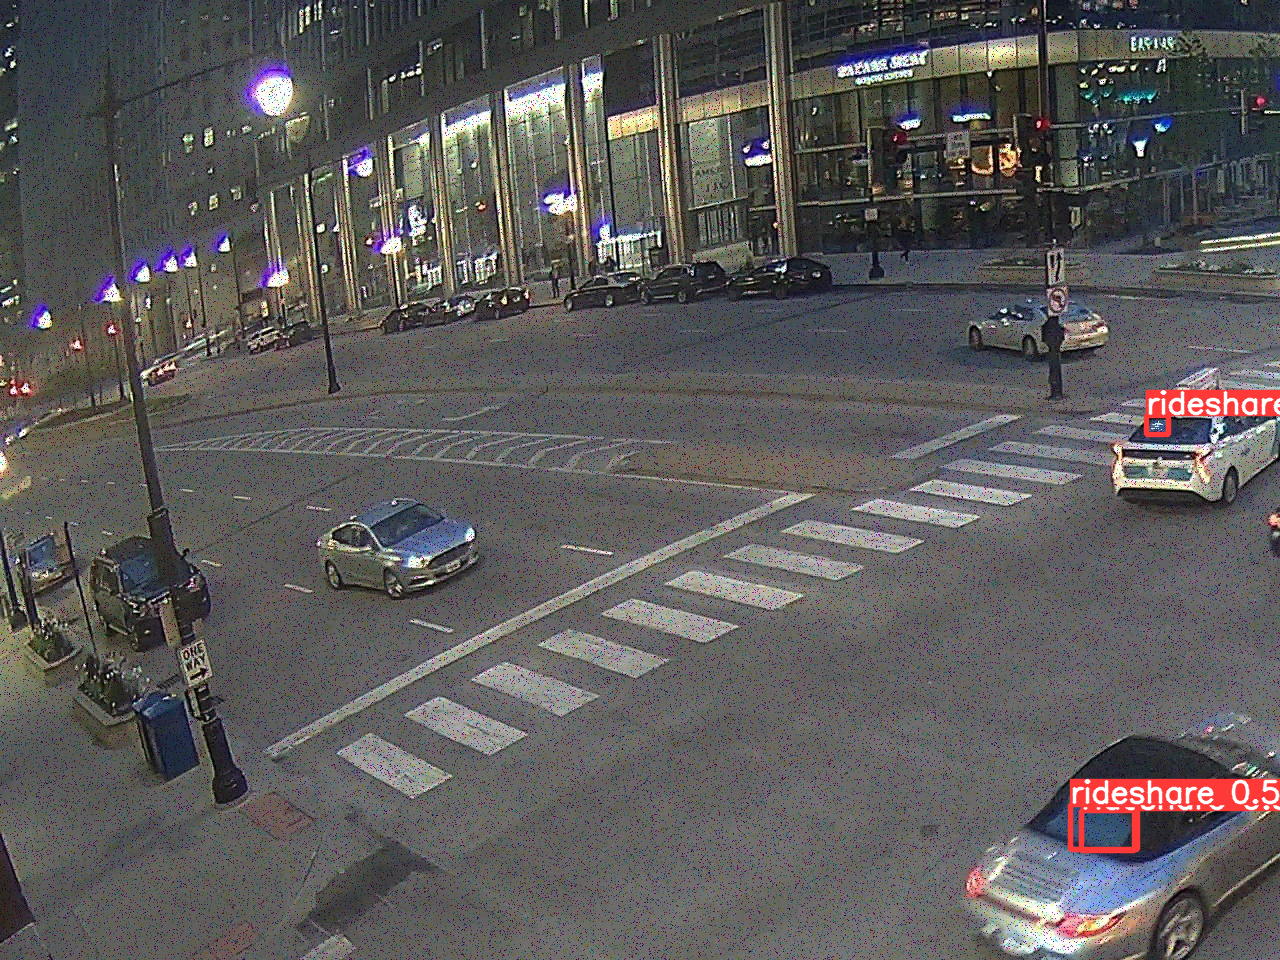

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[1.1462e+03, 4.1557e+02, 1.1684e+03, 4.3444e+02, 7.8003e-01, 0.0000e+00],
        [1.0705e+03, 8.0482e+02, 1.1378e+03, 8.4944e+02, 5.6455e-01, 0.0000e+00],
        [1.0816e+03, 8.1025e+02, 1.1341e+03, 8.5074e+02, 3.0107e-01, 0.0000e+00]], device='cuda:0')
cls: tensor([0., 0., 0.], device='cuda:0')
conf: tensor([0.7800, 0.5646, 0.3011], device='cuda:0')
data: tensor([[1.1462e+03, 4.1557e+02, 1.1684e+03, 4.3444e+02, 7.8003e-01, 0.0000e+00],
        [1.0705e+03, 8.0482e+02, 1.1378e+03, 8.4944e+02, 5.6455e-01, 0.0000e+00],
        [1.0816e+03, 8.1025e+02, 1.1341e+03, 8.5074e+02, 3.0107e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (960, 1280)
shape: torch.Size([3, 6])
xywh: tensor([[1157.3440,  425.0008,   22.2080,   18.8699],
        [1104.1450,  827.1305,   67.3889,   44.6223],
        [1107.8557,  830.4940,   52.5234,   40.4888]], device='cuda:0')
xywhn: tensor([[0.9042, 0.4427, 0.01

In [ ]:
from google.colab.patches import cv2_imshow

res_plotted = results[11].plot()
# cv2_imshow(res_plotted)
results[11].boxes

In [ ]:
# evaluated model on testing folder containing images with noise

!yolo val model= /content/drive/MyDrive/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/yolov7/yolov7/data/coco.yaml split=test

Ultralytics YOLOv8.0.123 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/yolov7/yolov7/data/test... 121 images, 69 backgrounds, 0 corrupt: 100% 121/121 [00:00<00:00, 246.26it/s]
val: New cache created: /content/drive/MyDrive/yolov7/yolov7/data/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:05<00:00,  1.52it/s]
                   all        121         56      0.886      0.691      0.781      0.361
Speed: 3.8ms preprocess, 6.2ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/val2


In [ ]:
# evaluated model on testing folder containing regular images (without noise)
# Final results were better than previous model (trained without noise pictures)

!yolo val model= /content/drive/MyDrive/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/yolov7/yolov7/data/coco.yaml split=test

Ultralytics YOLOv8.0.123 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/yolov7/yolov7/data/test... 295 images, 240 backgrounds, 0 corrupt: 100% 295/295 [00:13<00:00, 21.39it/s]
val: New cache created: /content/drive/MyDrive/yolov7/yolov7/data/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [00:11<00:00,  1.65it/s]
                   all        295         56      0.871      0.821      0.883      0.451
Speed: 0.9ms preprocess, 4.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val3


In [ ]:
!yolo task=detect mode=predict model='/content/runs/detect/train/weights/best.pt' source='/content/44q1_W07B.jpg' device=0


Ultralytics YOLOv8.0.123 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/1 /content/44q1_W07B.jpg: 480x640 (no detections), 63.4ms
Speed: 2.2ms preprocess, 63.4ms inference, 10.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict3


### Stage 2: Trying hyperparameter finetuning with Bayesian Optimization Method

Source: https://towardsdatascience.com/grid-search-vs-random-search-vs-bayesian-optimization-2e68f57c3c46

In [ ]:
!yolo task=detect mode=train model=/content/drive/MyDrive/last-4.pt data= /content/drive/MyDrive/yolov7/yolov7/data/coco.yaml epochs=30 device=0 batch=70


In [ ]:
# https://docs.ultralytics.com/yolov5/tutorials/tips_for_best_training_results/#model-selection
# https://docs.ultralytics.com/yolov5/tutorials/hyperparameter_evolution/